##### Background:
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.
Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

##### Problem:
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted.

##### Solution Proposed:
To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.
If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads.

##### Your Job:
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.


### Step 1 : Importing the data

In [1]:
# Importing all the necessary libraries

# removing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

In [2]:
# reading the data 
lead=pd.read_csv('Leads.csv')

### Step 2 : Inspecting the data 

In [3]:
# inspecting top 5 rows of the dataframe
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking the shape of the data frame
lead.shape

(9240, 37)

In [5]:
# checking the missing values and the data type of the columns
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# checking for the values of numerical columns
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 3 : Data Preparation 

#### handling missing values

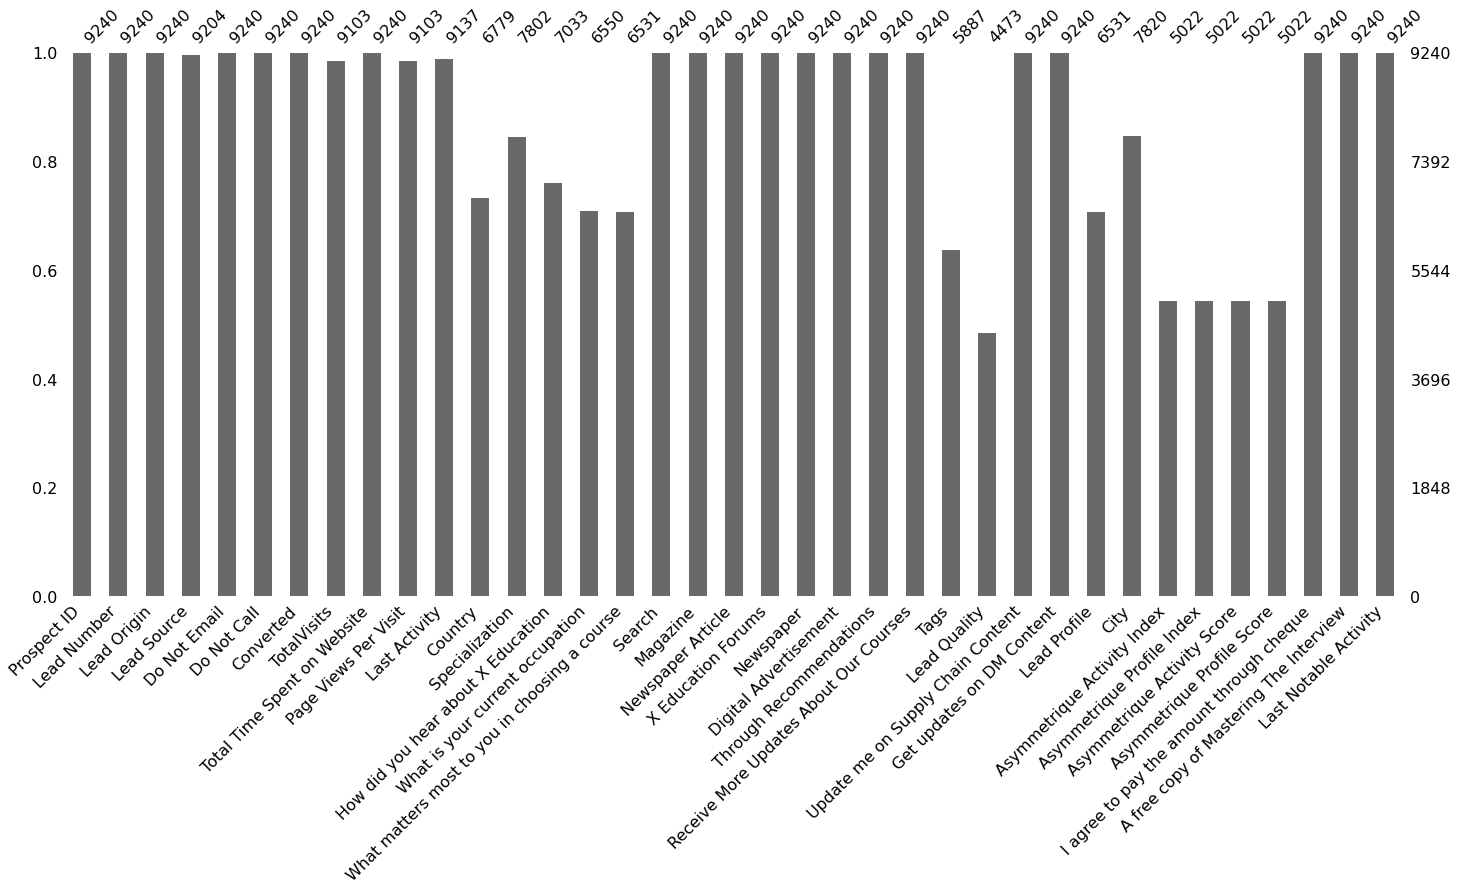

In [7]:
# visualizing missing values
msno.bar(lead)
plt.show()

In [8]:
# checking the % missing values in each column
round(lead.isnull().sum()/len(lead)*100,2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# we will remove all the columns with missing values > 40%
for i in lead.columns:
    if (100*lead[i].isna().sum()/lead.shape[0])>40:
        lead.drop(i,axis=1,inplace =True)
lead.shape

(9240, 32)

In [10]:
# column with missing values > 16% and <40% can be handled.
miss_col=[]
for i in lead.columns:
    if (100*lead[i].isna().sum()/lead.shape[0])>16:
        miss_col.append(i)
print(miss_col)

['Country', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Profile']


In [11]:
lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
China                      2
Belgium                    2
Ghana                      2
Netherlands                2
Philippines                2
Bangladesh                 2
Uganda                     2
Italy                      2
Asia/Pacific Region        2
Russia                     1
Denmark                    1
Vietnam                    1
Kenya                      1
Indonesia                  1
Switzerland                1
Tanzania      

In [12]:
# we have to create a new segment for missing values as replacing them with Mode can change properties of the overall column
lead['Country'] = lead['Country'].replace(np.nan, 'not selected')

In [13]:
# lets check  the values in 'How did you hear about X Education' column
lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [14]:
# we can replace all the missing values with 'select' as 'select' represent null values in this column
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].replace(np.nan, 'Select')

In [15]:
# lets check  the values in 'What is your current occupation' column
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [16]:
# we have to create a new segment for missing values as replacing them with Mode can change properties of the overall column
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'not selected')

In [17]:
# lets check  the values in 'What matters most to you in choosing a course' column
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [18]:
# we have to create a new segment for missing values as replacing them with Mode can change properties of the overall column
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'not selected')

In [19]:
# lets check  the values in 'Tags' column
lead['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [20]:
# we have to create a new segment for missing values as replacing them with Mode can change properties of the overall column
lead['Tags'] = lead['Tags'].replace(np.nan, 'not selected')

In [21]:
# lets check  the values in 'Lead Profile' column
lead['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [22]:
# we can replace all the missing values with 'select' as 'select' represent null values in this column
lead['Lead Profile'] = lead['Lead Profile'].replace(np.nan, 'Select')

In [23]:
# lets check  the values in 'City' column
lead['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [24]:
# we can replace all the missing values with 'select' as 'select' represent null values in this column
lead['City'] = lead['City'].replace(np.nan, 'Select')

In [25]:
# lets check  the values in 'Specialization' column
lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [26]:
# we can replace all the missing values with 'select' as 'select' represent null values in this column
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Select')

In [27]:
# other missing values in columns are very small in number < 1.5% so we can drop those rows
lead=lead.dropna()

In [28]:
# checking the shape
lead.shape

(9074, 32)

In [29]:
lead.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

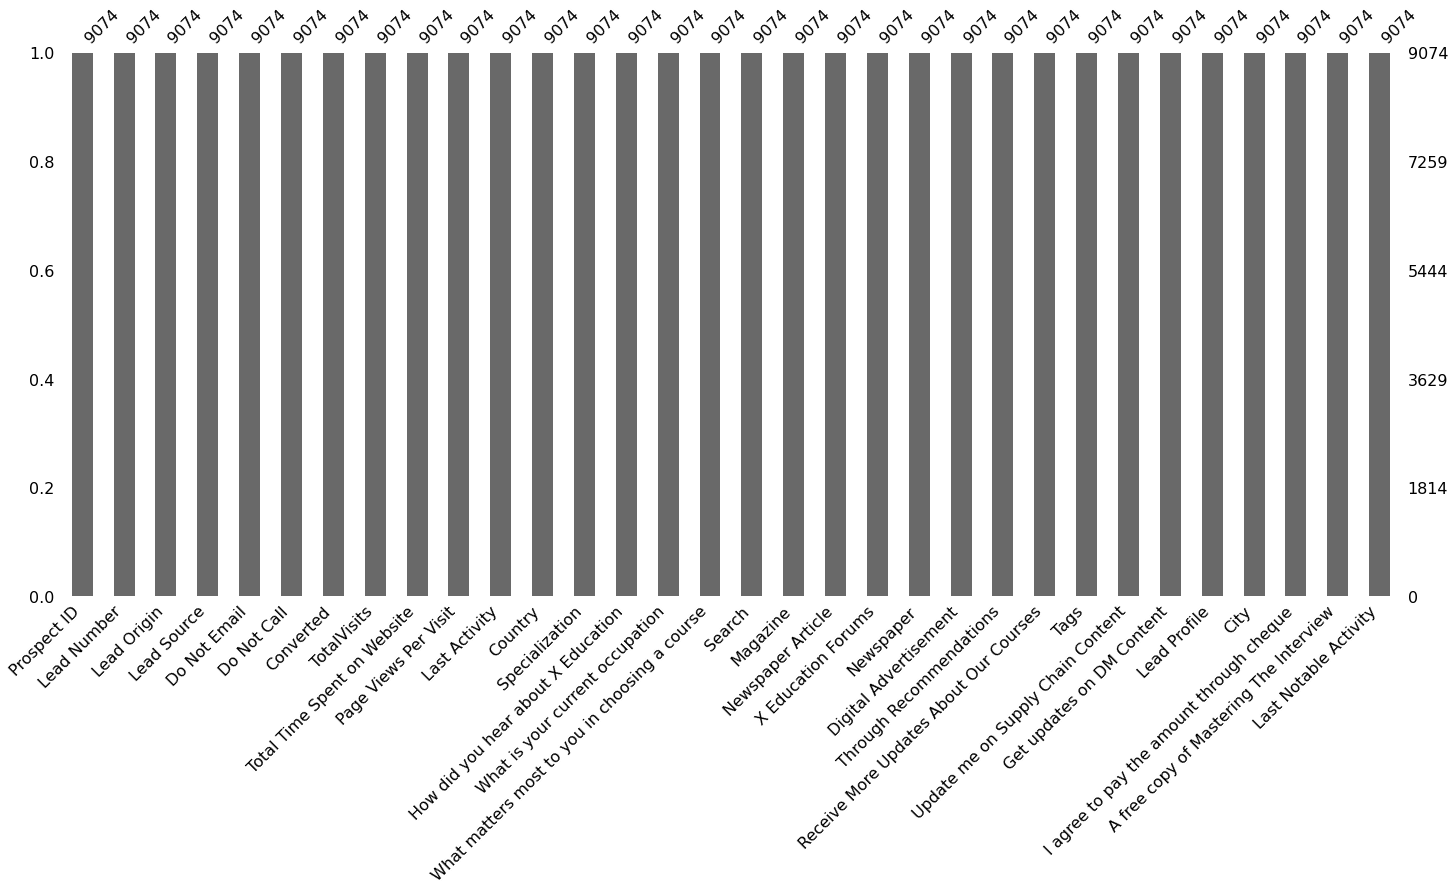

In [30]:
# lets visualize the missing values again to make sure its resolved
msno.bar(lead)
plt.show()

#### All the missing values are handled

In [31]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


#### Also numerical columns are well behaved and does not have outliers (there are no such value which looks suspicious or not possible according to business sense). 

### Step 4 : EDA and Data Modifications

In [32]:
# removing columns not needed for our analysis and model building
lead.drop(['Prospect ID', 'Lead Number'],1,inplace=True)

In [33]:
# bivariate analysis general code :
def uni_cat_analysis(df0,z):
    plt.figure(figsize=(15, 6), dpi=80)
    plt.title('Converted')
    data1=pd.DataFrame(round(df0[df0['Converted']==1][z].value_counts()/df0[z].value_counts()*100,2))
    data1=data1.reset_index()
    data1.columns=[z,'% Converted']
    graph = sns.barplot(x=z, data=data1,y="% Converted")
    graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
    i=0
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height ,
            round(data1['% Converted'][i],2),ha="center")
        i += 1
    plt.show()
    print('number of leads converted are as below: \n')
    print(df0[df0['Converted']==1][z].value_counts())

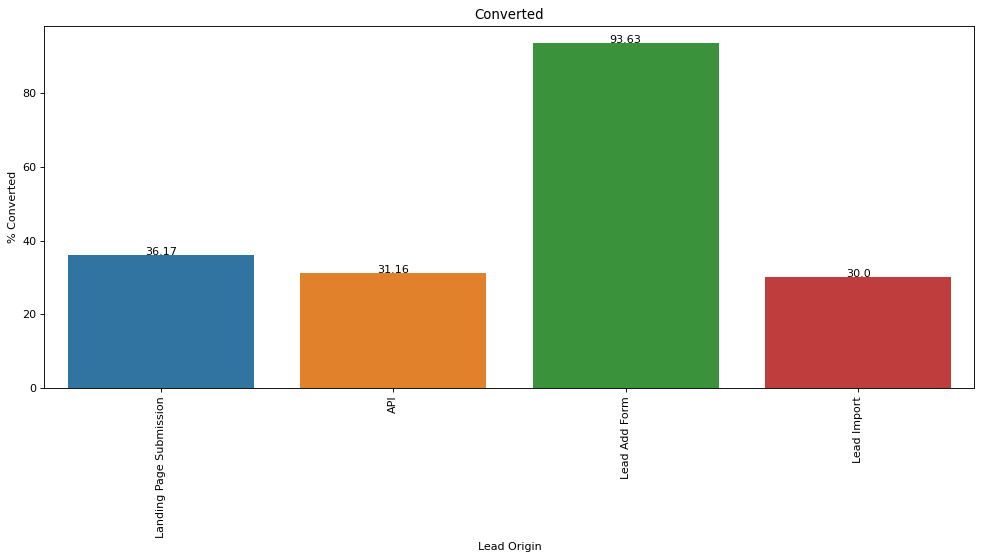

number of leads converted are as below: 

Landing Page Submission    1767
API                        1115
Lead Add Form               544
Lead Import                   9
Name: Lead Origin, dtype: int64


In [34]:
# bivariate analysis on Lead Origin column
uni_cat_analysis(lead,'Lead Origin')

#### Inference :
- Lead Add Form category have highest % of convertions.
- Landing Page Submission category gives highest no of convertions.

#### making inferences on data  from 'Lead Source' column directly may be misleading so we modify it.

In [35]:
# making inferences on data from 'Lead Source' column directly may be misleading so we modify it
# merging redundant category in 'Lead Source'
lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')

In [36]:
# some categories have <10 records so there % conversion can mislead our analysis so we drop them
lead=lead[(lead['Lead Source']== 'Google') | (lead['Lead Source']== 'Direct Traffic') | (lead['Lead Source']== 'Olark Chat') | (lead['Lead Source']== 'Organic Search') | (lead['Lead Source']== 'Reference') | (lead['Lead Source']== 'Welingak Website') | (lead['Lead Source']== 'Referral Sites') | (lead['Lead Source']== 'Facebook')]

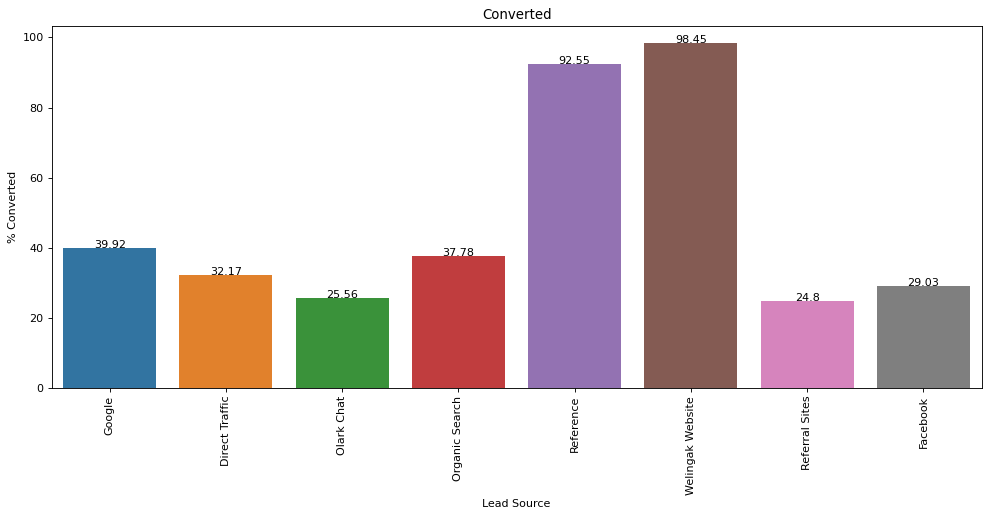

number of leads converted are as below: 

Google              1147
Direct Traffic       818
Olark Chat           448
Organic Search       436
Reference            410
Welingak Website     127
Referral Sites        31
Facebook               9
Name: Lead Source, dtype: int64


In [37]:
# analysis and cleaning of Lead source 
uni_cat_analysis(lead,'Lead Source')

#### Inference:
- Highest % of convertion are from Reference and Welingak Website category. 
- Highest no of convertions are from Google and Direct Traffic category.

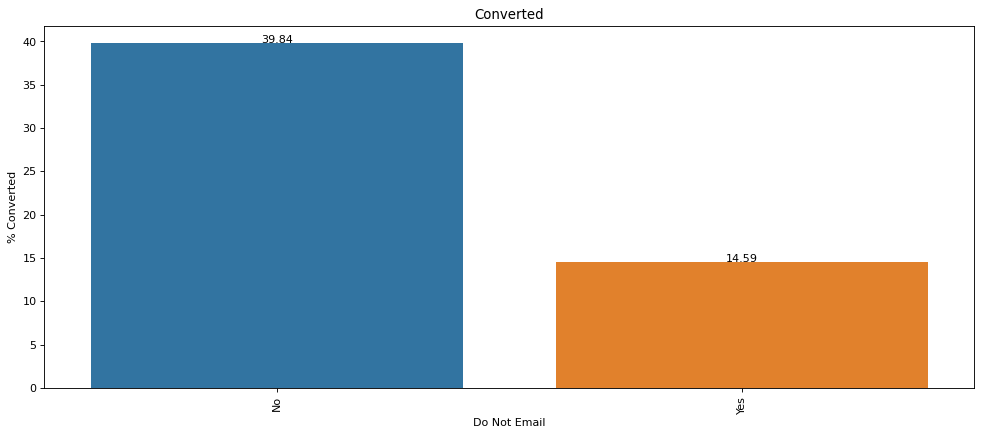

number of leads converted are as below: 

No     3322
Yes     104
Name: Do Not Email, dtype: int64


In [38]:
# bivariate analysis on 'Do Not Email' column
uni_cat_analysis(lead,'Do Not Email')

#### Inference :
- people who say no to Do not email have clearly high chance to convert.

In [39]:
# we drop this column as there are only 2 data points in yes category so all of them said 'no' to this.
# so this column won't be helpful for the analysis 
# removing columns not needed for our analysis and model building
lead.drop('Do Not Call',1,inplace=True)

In [40]:
# we have to modify TotalVisits column in order to analyse it 
# Binning the TotalVisits column and divide them into 5 categories according to no of visists.
lead['TotalVisits']=pd.cut(lead['TotalVisits'],[-1,2,4,6,10,251],labels=['0-2','2-4','4-6','6-10','10+'])

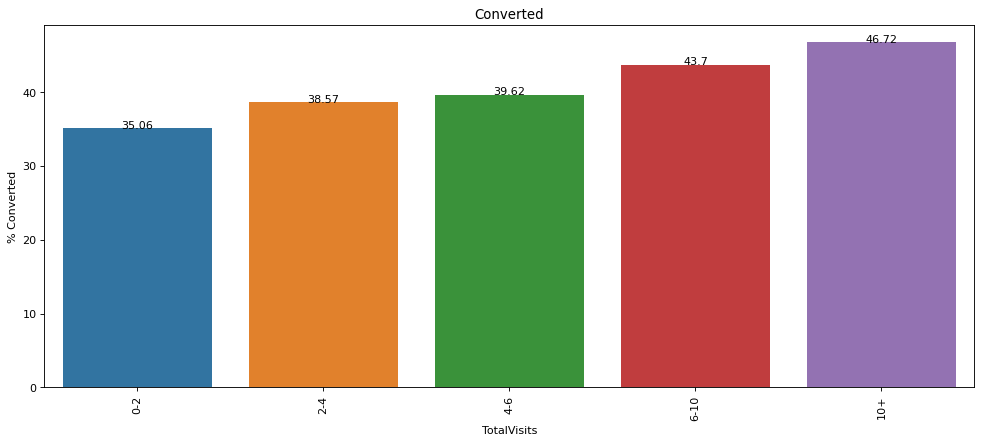

number of leads converted are as below: 

0-2     1481
2-4      933
4-6      494
6-10     354
10+      164
Name: TotalVisits, dtype: int64


In [41]:
# bivariate analysis on 'TotalVisits' column
uni_cat_analysis(lead,'TotalVisits')

#### Inference :
- probablity of convertions increases with the increase in total visits.
- We are getting highest no of convertion in 2-4 category.

In [42]:
# there are less no of data points in each category so we will merge other minor category to positive last activity or negative last activity
lead['Last Activity'] = lead['Last Activity'].replace(['Page Visited on Website','Olark Chat Conversation','Email Link Clicked',
                                                      'Converted to Lead','Form Submitted on Website','Had a Phone Conversation',
                                                      'Approached upfront','Email Received','Resubscribed to emails',
                                                      'View in browser link Clicked','Visited Booth in Tradeshow','Unreachable','Email Bounced','Unsubscribed','Email Marked Spam'], 'Other activity')

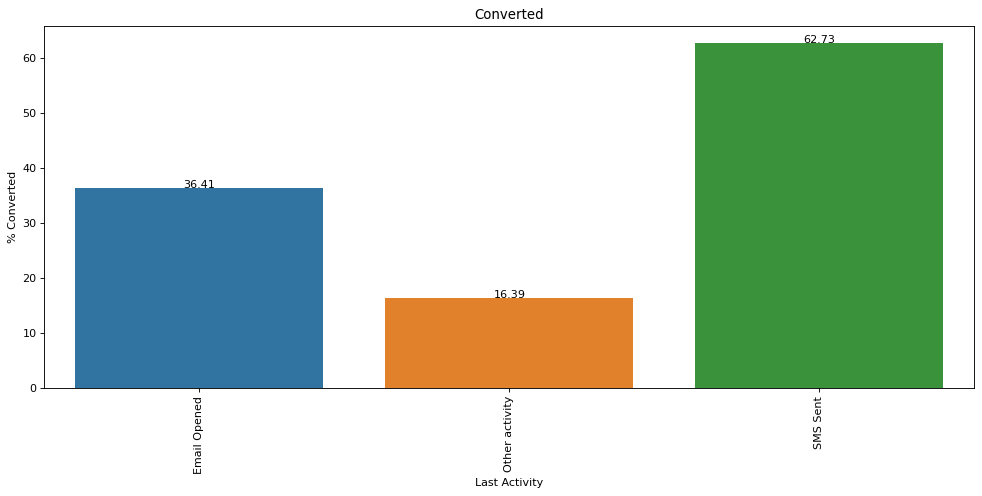

number of leads converted are as below: 

SMS Sent          1702
Email Opened      1246
Other activity     478
Name: Last Activity, dtype: int64


In [43]:
# bivariate analysis on 'Last Activity' column
uni_cat_analysis(lead,'Last Activity')

#### Inference:
- SMS Sent category have the highest conversion rate and number of conversions.

In [44]:
# As country and city does not play any role in convertion of a lead we will drop it.
lead.drop(['Country','City'],1,inplace=True)

In [45]:
# merging all the categories with small number of data points to other category.
lead['What is your current occupation'] = lead['What is your current occupation'].replace(['Student','Other','Housewife','Businessman'],'others')

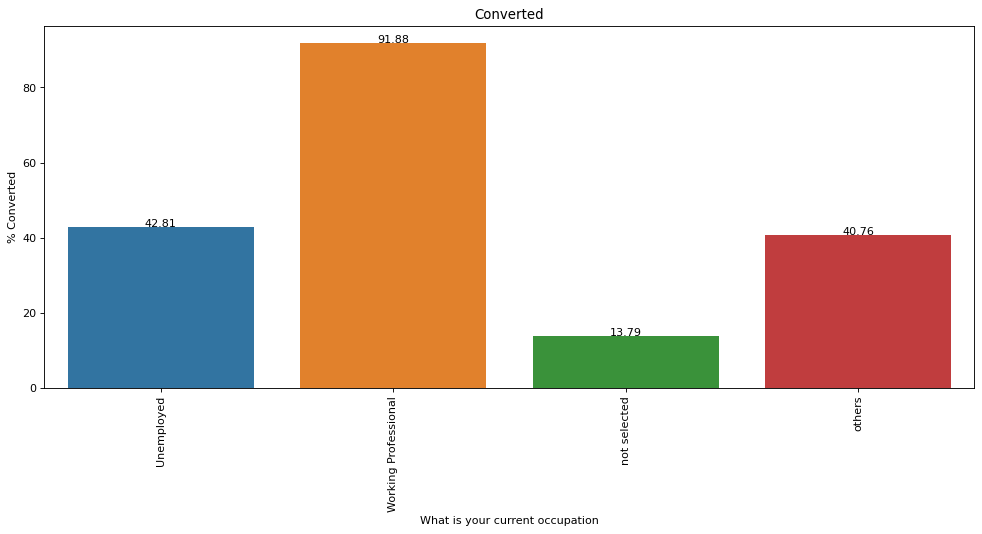

number of leads converted are as below: 

Unemployed              2338
Working Professional     622
not selected             369
others                    97
Name: What is your current occupation, dtype: int64


In [46]:
# bivariate analysis on 'What is your current occupation' column
uni_cat_analysis(lead,'What is your current occupation')

####  Inference :
- Working Professional category has heighest convertion rate.
- highest number of convertion takes place in Unemployed category.

In [47]:
# we can drop What matters most to you in choosing a course column as all of them told the same thing and other people did not
# respond so we are not getting any insights from this
lead.drop('What matters most to you in choosing a course',1,inplace=True)

In [48]:
# we drop 'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations' columns as there are no data points in 'yes' category so all of them said 'no' to this.
# so this column won't be helpful for the analysis 
# removing columns not needed for our analysis and model building
lead.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],1,inplace=True)

In [49]:
# we drop 'Receive More Updates About Our Courses' column as there are no data points in yes category so all of them said no to this.
# so this column won't be helpful for the analysis 
# removing columns not needed for our analysis and model building
lead.drop('Receive More Updates About Our Courses',1,inplace=True)

In [50]:
# we are dropping the tags column as we won't be having tags for the new leads and also it is representation of exact output
lead.drop('Tags',1,inplace=True)

In [51]:
# we drop 'Update me on Supply Chain Content','Get updates on DM Content' column as there are no data points in yes category so all of them said no to this.
# so this column won't be helpful for the analysis 
# removing columns not needed for our analysis and model building
lead.drop(['Update me on Supply Chain Content','Get updates on DM Content'],1,inplace=True)

In [52]:
# analysing Lead Profile column
lead['Lead Profile'].value_counts()/len(lead)

Select                         0.744890
Potential Lead                 0.171141
Other Leads                    0.053143
Student of SomeSchool          0.026295
Lateral Student                0.002320
Dual Specialization Student    0.002210
Name: Lead Profile, dtype: float64

In [53]:
# As select represent null values so we have 75% missing value in 'lead Profile' so we drop this column
lead.drop(['Lead Profile'],1,inplace=True)

In [54]:
# we drop 'I agree to pay the amount through cheque' column as there are no data points in yes category so all of them said no to this.
# so this column won't be helpful for the analysis 
# removing columns not needed for our analysis and model building
lead.drop(['I agree to pay the amount through cheque'],1,inplace=True)

In [55]:
# we drop 'Last Notable Activity'column as it is same as Last Activity column 
# so this column won't be helpful for the analysis 
# removing columns not needed for our analysis and model building
lead.drop(['Last Notable Activity'],1,inplace=True)

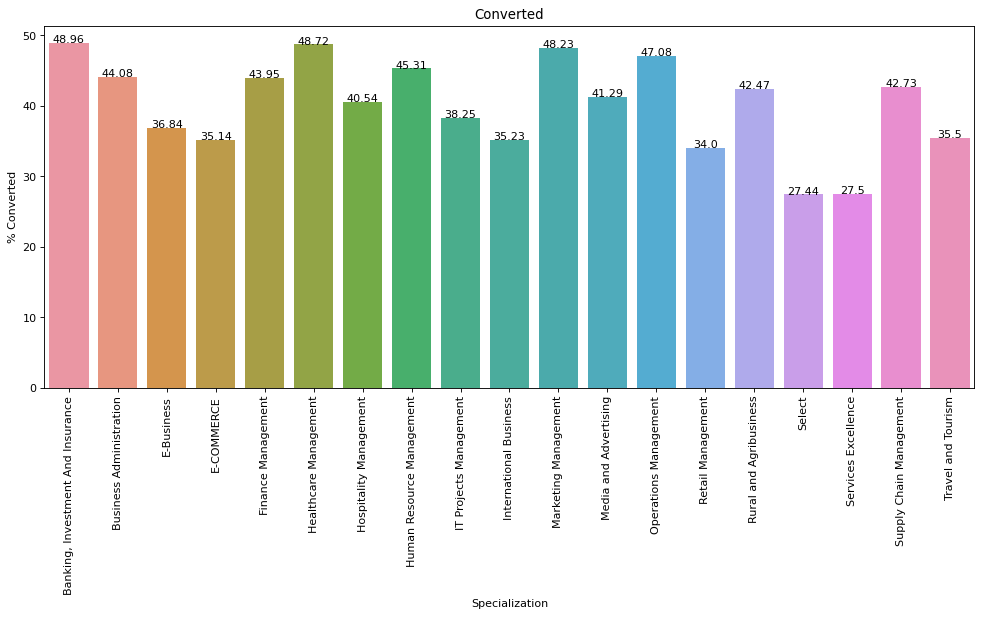

number of leads converted are as below: 

Select                               899
Finance Management                   421
Marketing Management                 396
Human Resource Management            377
Operations Management                234
Business Administration              175
Banking, Investment And Insurance    164
Supply Chain Management              147
IT Projects Management               140
Media and Advertising                 83
Healthcare Management                 76
Travel and Tourism                    71
International Business                62
Hospitality Management                45
E-COMMERCE                            39
Retail Management                     34
Rural and Agribusiness                31
E-Business                            21
Services Excellence                   11
Name: Specialization, dtype: int64


In [56]:
# bivariate analysis on 'Tags' column
uni_cat_analysis(lead,'Specialization')

#### Inference:
- Select category have lowest conversion rate which shows that people not selecting specialization are not intrested in the course.

In [57]:
# analysing How did you hear about X Education column 
lead['How did you hear about X Education'].value_counts()/len(lead)

Select                   0.781019
Online Search            0.089051
Word Of Mouth            0.038228
Student of SomeSchool    0.034140
Other                    0.020550
Multiple Sources         0.016794
Advertisements           0.007513
Social Media             0.007292
Email                    0.002873
SMS                      0.002541
Name: How did you hear about X Education, dtype: float64

In [58]:
# As select represent null values so we have 75% missing value in 'lead Profile' so we drop this column
lead.drop(['How did you hear about X Education'],1,inplace=True)

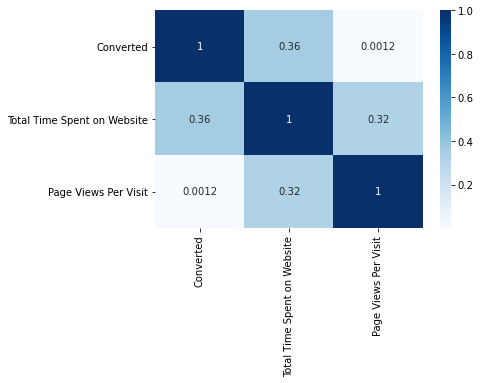

In [59]:
# checking correlations between numerical variables 
sns.heatmap(lead.corr(),annot=True,cmap='Blues')

In [60]:
# function for numerical bivariate analysis
def uni_numerical(df0,z,x):
    plt.figure(figsize=[15,6])
    plt.title('Density plot of {} column'.format(z))
    plt.ylabel('Density')
    df1=df0[df0['Converted']==0]
    df2=df0[df0['Converted']==1]
    sns.distplot(df1[df1[z]>x][z],hist=False,label='Not-Converted')
    sns.distplot(df2[df2[z]>x][z],hist=False,label='Converted')
    plt.show()

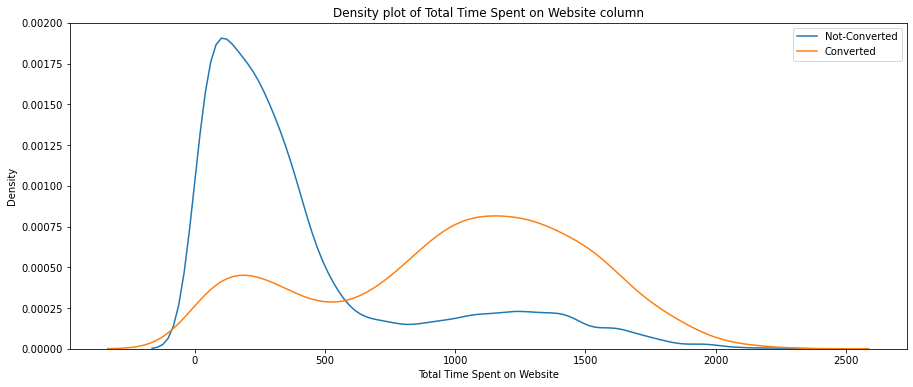

In [61]:
uni_numerical(lead,'Total Time Spent on Website',0)

#### Inference :
- We can observe that as the total time spend on website increases, probablity of convertion increases. 

In [62]:
# converting 'Do Not Email' to 1/0 
lead['Do Not Email']=lead['Do Not Email'].apply(lambda x: 0 if x=='No' else 1)

In [63]:
# converting 'A free copy of Mastering The Interview' to 1/0 
lead['A free copy of Mastering The Interview']=lead['A free copy of Mastering The Interview'].apply(lambda x: 0 if x=='No' else 1)

In [64]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0-2,0,0.0,Other activity,Select,Unemployed,0
1,API,Organic Search,0,0,4-6,674,2.5,Email Opened,Select,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,0-2,1532,2.0,Email Opened,Business Administration,others,1
3,Landing Page Submission,Direct Traffic,0,0,0-2,305,1.0,Other activity,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,0-2,1428,1.0,Other activity,Select,Unemployed,0


In [65]:
lead.shape

(9051, 11)

### Step 5 : Preparing data for modeling

####  Dummy variable creation

In [66]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'TotalVisits',
         'Last Activity','Specialization', 'What is your current occupation']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)
lead.drop(['Lead Origin', 'Lead Source', 'TotalVisits',
         'Last Activity','Specialization', 'What is your current occupation'],1,inplace=True)

In [67]:
lead.shape

(9051, 42)

In [68]:
# Creating X,y
y=lead.pop('Converted')
X = lead

In [69]:
# checking X
X.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,TotalVisits_2-4,TotalVisits_4-6,TotalVisits_6-10,TotalVisits_10+,Last Activity_Other activity,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Working Professional,What is your current occupation_not selected,What is your current occupation_others
0,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [70]:
# checking y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

#### Test Train Split

In [71]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [72]:
# checking the shape after test train split
X_train.shape

(6335, 41)

In [73]:
# checking the shape of the test data after the split 
X_test.shape

(2716, 41)

#### Standard Scaling 

In [74]:
# standard scaling the numerical variable
scaler = StandardScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,TotalVisits_2-4,TotalVisits_4-6,TotalVisits_6-10,TotalVisits_10+,Last Activity_Other activity,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Working Professional,What is your current occupation_not selected,What is your current occupation_others
4045,0,-0.396112,-0.169432,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1615,0,-0.888270,-1.079553,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2928,0,-0.076576,-0.169432,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1238,0,-0.888270,-1.079553,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6985,0,-0.888270,-1.079553,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### Step 6 : Model building 

#### Feature selection using RFE

In [75]:
# Feature Selection Using RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [76]:
# lets check top 15 columns
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'TotalVisits_10+',
       'Last Activity_Other activity', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Select',
       'Specialization_Services Excellence',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not selected'],
      dtype='object')

#### Model-1

In [77]:
# Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6335
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.6
Date:                Wed, 10 Nov 2021   Deviance:                       5155.2
Time:                        13:06:23   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1247      0.129     -0.969      0.333      -0.377       0.128
Do Not Email                                            -1.0191      0.175     -5.835      0.000      -1.361      -0.677
Total Time Spent on Website                              1.1012      0.041     27.189      0.000       1.022       1.181
Lead Origin_Landing Page Submission                     -0.8905      0.128     -6.955      0.000      -1.142      -0.640
Lead Origin_Lead Add Form                               -0.7774      1.511     -0.514      0.607      -3.739       2.185
Lead Source_Olark Chat                                   1.1586      0.122      9.520      0.000       0.920       1.397
Lead Source_Reference                                    4.1902      1.534      2.732      0.006       1.184       7.196
Lead Source_Welingak Website                             6.9512      1.823      3.813      0.000       3.378      10.524
TotalVisits_10+                                          0.5634      0.171      3.292      0.001       0.228       0.899
Last Activity_Other activity                            -0.8110      0.094     -8.657      0.000      -0.995      -0.627
Last Activity_SMS Sent                                   1.1152      0.081     13.793      0.000       0.957       1.274
Specialization_Hospitality Management                   -0.9095      0.316     -2.879      0.004      -1.529      -0.290
Specialization_Select                                   -0.9450      0.125     -7.558      0.000      -1.190      -0.700
Specialization_Services Excellence                      -0.7450      0.781     -0.954      0.340      -2.275       0.785
What is your current occupation_Working Professional     2.4400      0.195     12.516      0.000       2.058       2.822
What is your current occupation_not selected            -1.1962      0.087    -13.679      0.000      -1.368      -1.025
========================================================================================================================
"""

In [78]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4045    0.403581
1615    0.556287
2928    0.042830
1238    0.052335
6985    0.110531
1737    0.944355
5206    0.956718
5021    0.834174
5133    0.061849
1553    0.609079
dtype: float64

In [79]:
# making the prediction table
y_train_pred_final = pd.DataFrame({'Actual':y_train.values, 'probability':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Actual,probability,CustID
4045,0,0.403581,4045
1615,1,0.556287,1615
2928,0,0.042830,2928
1238,0,0.052335,1238
6985,0,0.110531,6985


In [80]:
# Let's choose a random cutoff and make predictions
y_train_pred_final['Predicted'] = y_train_pred_final.probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Actual,probability,CustID,Predicted
4045,0,0.403581,4045,0
1615,1,0.556287,1615,1
2928,0,0.042830,2928,0
1238,0,0.052335,1238,0
6985,0,0.110531,6985,0


In [81]:
# checking out the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final.Predicted )
print(confusion)

[[3479  444]
 [ 720 1692]]


In [82]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [83]:
# Let's see the sensitivity and specificity of our logistic regression model
sensititvity=TP / float(TP+FN)
specificity=TN / float(TN+FP)


In [84]:
# Let's check the overall accuracy.
print('Accuracy : ', round(metrics.accuracy_score(y_train_pred_final.Actual, y_train_pred_final.Predicted),3))
print('Sensititvity : ', round(sensititvity,3))
print('Specificity : ', round(specificity,3))

Accuracy :  0.816
Sensititvity :  0.701
Specificity :  0.887


In [85]:
# checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,203.58
5,Lead Source_Reference,158.41
6,Lead Source_Welingak Website,46.80
11,Specialization_Select,2.40
2,Lead Origin_Landing Page Submission,2.00
8,Last Activity_Other activity,1.98
4,Lead Source_Olark Chat,1.92
9,Last Activity_SMS Sent,1.77
14,What is your current occupation_not selected,1.60
1,Total Time Spent on Website,1.29


#### Model 2 

In [86]:
# dropping the column with the highest P-value 
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'TotalVisits_10+', 'Last Activity_Other activity',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Select', 'Specialization_Services Excellence',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not selected'],
      dtype='object')

In [87]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6335
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.7
Date:                Wed, 10 Nov 2021   Deviance:                       5155.4
Time:                        13:06:24   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1261      0.129     -0.980      0.327      -0.378       0.126
Do Not Email                                            -1.0188      0.175     -5.833      0.000      -1.361      -0.676
Total Time Spent on Website                              1.1006      0.040     27.185      0.000       1.021       1.180
Lead Origin_Landing Page Submission                     -0.8892      0.128     -6.947      0.000      -1.140      -0.638
Lead Source_Olark Chat                                   1.1556      0.122      9.506      0.000       0.917       1.394
Lead Source_Reference                                    3.4127      0.257     13.263      0.000       2.908       3.917
Lead Source_Welingak Website                             6.1728      1.017      6.072      0.000       4.180       8.165
TotalVisits_10+                                          0.5637      0.171      3.294      0.001       0.228       0.899
Last Activity_Other activity                            -0.8110      0.094     -8.657      0.000      -0.995      -0.627
Last Activity_SMS Sent                                   1.1155      0.081     13.798      0.000       0.957       1.274
Specialization_Hospitality Management                   -0.9088      0.316     -2.877      0.004      -1.528      -0.290
Specialization_Select                                   -0.9431      0.125     -7.548      0.000      -1.188      -0.698
Specialization_Services Excellence                      -0.7442      0.781     -0.953      0.340      -2.274       0.786
What is your current occupation_Working Professional     2.4405      0.195     12.520      0.000       2.058       2.822
What is your current occupation_not selected            -1.1954      0.087    -13.673      0.000      -1.367      -1.024
========================================================================================================================
"""

In [88]:
# making predictions 
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [89]:
# updating the predicted column
y_train_pred_final['probability'] = y_train_pred

In [90]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Actual,probability,CustID,Predicted
4045,0,0.403802,4045,0
1615,1,0.555845,1615,1
2928,0,0.042858,2928,0
1238,0,0.052268,1238,0
6985,0,0.110402,6985,0


In [91]:
# checking out the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final.Predicted )
print(confusion)

[[3478  445]
 [ 720 1692]]


In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Let's see the sensitivity and specificity of our logistic regression model
sensititvity=TP / float(TP+FN)
specificity=TN / float(TN+FP)

In [94]:
# Let's check the overall accuracy.
print('Accuracy : ', round(metrics.accuracy_score(y_train_pred_final.Actual, y_train_pred_final.Predicted),3))
print('Sensititvity : ', round(sensititvity,3))
print('Specificity : ', round(specificity,3))

Accuracy :  0.816
Sensititvity :  0.701
Specificity :  0.887


In [95]:
# checking the VIF of the columns  
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Select,2.40
2,Lead Origin_Landing Page Submission,2.00
7,Last Activity_Other activity,1.98
3,Lead Source_Olark Chat,1.92
8,Last Activity_SMS Sent,1.77
13,What is your current occupation_not selected,1.60
1,Total Time Spent on Website,1.28
4,Lead Source_Reference,1.22
0,Do Not Email,1.20
12,What is your current occupation_Working Profes...,1.19


#### Model 3


In [96]:
# dropping the column with the highest P-value 
col = col.drop('Specialization_Services Excellence', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'TotalVisits_10+', 'Last Activity_Other activity',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Select',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not selected'],
      dtype='object')

In [97]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6335
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.2
Date:                Wed, 10 Nov 2021   Deviance:                       5156.4
Time:                        13:06:24   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1301      0.129     -1.012      0.311      -0.382       0.122
Do Not Email                                            -1.0225      0.174     -5.861      0.000      -1.364      -0.681
Total Time Spent on Website                              1.1010      0.040     27.194      0.000       1.022       1.180
Lead Origin_Landing Page Submission                     -0.8862      0.128     -6.929      0.000      -1.137      -0.636
Lead Source_Olark Chat                                   1.1558      0.122      9.507      0.000       0.918       1.394
Lead Source_Reference                                    3.4076      0.257     13.259      0.000       2.904       3.911
Lead Source_Welingak Website                             6.1733      1.017      6.073      0.000       4.181       8.166
TotalVisits_10+                                          0.5634      0.171      3.294      0.001       0.228       0.899
Last Activity_Other activity                            -0.8134      0.094     -8.684      0.000      -0.997      -0.630
Last Activity_SMS Sent                                   1.1147      0.081     13.791      0.000       0.956       1.273
Specialization_Hospitality Management                   -0.9057      0.316     -2.867      0.004      -1.525      -0.287
Specialization_Select                                   -0.9376      0.125     -7.513      0.000      -1.182      -0.693
What is your current occupation_Working Professional     2.4417      0.195     12.525      0.000       2.060       2.824
What is your current occupation_not selected            -1.1967      0.087    -13.692      0.000      -1.368      -1.025
========================================================================================================================
"""

In [98]:
# predicting the values 
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [99]:
# making the prediction table
y_train_pred_final = pd.DataFrame({'Actual':y_train.values, 'probability':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Actual,probability,CustID
0,0,0.403919,4045
1,1,0.555967,1615
2,0,0.042665,2928
3,0,0.052153,1238
4,0,0.110405,6985


In [100]:
# Let's choose a random cutoff and make predictions
y_train_pred_final['Predicted'] = y_train_pred_final.probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Actual,probability,CustID,Predicted
0,0,0.403919,4045,0
1,1,0.555967,1615,1
2,0,0.042665,2928,0
3,0,0.052153,1238,0
4,0,0.110405,6985,0


In [101]:
# checking out the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final.Predicted )
print(confusion)

[[3478  445]
 [ 719 1693]]


In [102]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [103]:
# Let's see the sensitivity and specificity of our logistic regression model
sensititvity=TP / float(TP+FN)
specificity=TN / float(TN+FP)

In [104]:
# Let's check the overall accuracy.
print('Accuracy : ', round(metrics.accuracy_score(y_train_pred_final.Actual, y_train_pred_final.Predicted),3))
print('Sensititvity : ', round(sensititvity,3))
print('Specificity : ', round(specificity,3))

Accuracy :  0.816
Sensititvity :  0.702
Specificity :  0.887


In [105]:
# checking the VIF of the columns  
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Select,2.40
2,Lead Origin_Landing Page Submission,1.99
7,Last Activity_Other activity,1.98
3,Lead Source_Olark Chat,1.92
8,Last Activity_SMS Sent,1.77
12,What is your current occupation_not selected,1.60
1,Total Time Spent on Website,1.28
4,Lead Source_Reference,1.22
0,Do Not Email,1.19
11,What is your current occupation_Working Profes...,1.19


#### All the p values and VIF values are in controll so this is the final model.

### Step 7 : Making ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [106]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [107]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Actual, y_train_pred_final.probability, drop_intermediate = False )

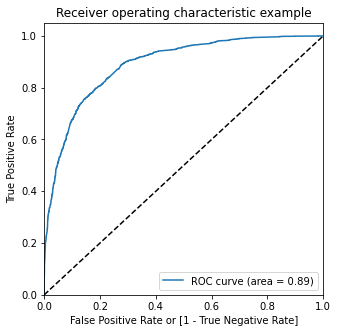

In [108]:
draw_roc(y_train_pred_final.Actual, y_train_pred_final.probability)

#### Area under the curve is 0.89 so its a good model.

### Step 8 : Finding Optimal Cutoff Point 

In [109]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual,probability,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.403919,4045,0,1,1,1,1,1,0,0,0,0,0
1,1,0.555967,1615,1,1,1,1,1,1,1,0,0,0,0
2,0,0.042665,2928,0,1,0,0,0,0,0,0,0,0,0
3,0,0.052153,1238,0,1,0,0,0,0,0,0,0,0,0
4,0,0.110405,6985,0,1,1,0,0,0,0,0,0,0,0


In [110]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380742  1.000000  0.000000
0.1   0.1  0.615470  0.974295  0.394851
0.2   0.2  0.757537  0.917496  0.659189
0.3   0.3  0.796369  0.837894  0.770839
0.4   0.4  0.813575  0.769900  0.840428
0.5   0.5  0.816259  0.701907  0.886566
0.6   0.6  0.799211  0.599088  0.922253
0.7   0.7  0.785162  0.519900  0.948254
0.8   0.8  0.757537  0.415423  0.967882
0.9   0.9  0.722810  0.293118  0.987000


<Figure size 1200x480 with 0 Axes>

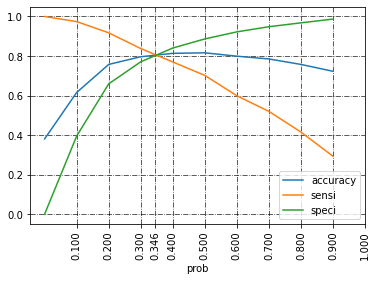

In [111]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(15, 6), dpi=80)
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid(color='black',alpha=0.8 ,ls = '-.')
plt.xticks([0.1,0.2,0.3,0.346,0.4,0.5,0.6,0.7,0.8,0.9,1.0], rotation=90)
plt.show()

#### According to the above graph we can see that 0.35 is the cut-off but as we want higher sensitivity so lets keep the cut-off to 0.3.

In [112]:
# Making final model
y_train_pred_final['final_predicted'] = y_train_pred_final.probability.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Actual,probability,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.403919,4045,0,1,1,1,1,1,0,0,0,0,0,1
1,1,0.555967,1615,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.042665,2928,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.052153,1238,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.110405,6985,0,1,1,0,0,0,0,0,0,0,0,0


In [113]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Actual, y_train_pred_final.final_predicted)

0.7963693764798737

In [114]:
confusion = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final.final_predicted )
print(confusion)

[[3024  899]
 [ 391 2021]]


In [115]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [116]:
# Let's see the sensitivity and specificity of our logistic regression model
train_accuracy=metrics.accuracy_score(y_train_pred_final.Actual, y_train_pred_final.final_predicted)
train_sensititvity=TP / float(TP+FN)
train_specificity=TN / float(TN+FP)

In [117]:
# Let's check the overall accuracy.
print('Accuracy : ',round(train_accuracy ,2))
print('Sensititvity : ', round(train_sensititvity,2))
print('Specificity : ', round(train_specificity,2))

Accuracy :  0.8
Sensititvity :  0.84
Specificity :  0.77


### Step 9 : Making predictions on the test set

In [118]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,TotalVisits_2-4,TotalVisits_4-6,TotalVisits_6-10,TotalVisits_10+,Last Activity_Other activity,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Working Professional,What is your current occupation_not selected,What is your current occupation_others
4741,0,206,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3786,0,1552,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7432,0,1277,2.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8416,1,311,6.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,1,5.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'TotalVisits_10+', 'Last Activity_Other activity',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Select',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not selected'],
      dtype='object')

In [120]:
# scaling the numerical column of test set
X_test[['Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit']])

In [121]:
# keeping just the columns for the final model
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,TotalVisits_10+,Last Activity_Other activity,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Select,What is your current occupation_Working Professional,What is your current occupation_not selected
4741,0,-0.509969,1,0,0,0,0,1,0,0,0,0,1
3786,0,1.961841,1,0,0,0,0,0,0,0,0,1,0
7432,0,1.456828,1,0,0,0,0,0,1,0,0,0,0
8416,1,-0.317146,1,0,0,0,0,1,0,0,0,0,0
998,0,-0.886434,1,0,0,0,0,0,0,1,0,0,0


In [122]:
# adding constants
X_test_sm = sm.add_constant(X_test)

In [123]:
#predicting the result
y_test_pred = res.predict(X_test_sm)

In [124]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [125]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [126]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [127]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [129]:
y_pred_final.head()

,Converted,CustID,0
0,0,4741,0.026911
1,1,3786,0.973020
2,1,7432,0.845841
3,0,8416,0.039112
4,0,998,0.052250


In [130]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Probability'})

In [131]:
y_pred_final['final_predicted'] = y_pred_final.Probability.map(lambda x: 1 if x > 0.3 else 0)

In [132]:
y_pred_final.head()

,Converted,CustID,Probability,final_predicted
0,0,4741,0.026911,0
1,1,3786,0.973020,1
2,1,7432,0.845841,1
3,0,8416,0.039112,0
4,0,998,0.052250,0


In [133]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1336,  366],
       [ 171,  843]], dtype=int64)

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Let's see the sensitivity and specificity of our logistic regression model
test_accuracy=metrics.accuracy_score(y_train_pred_final.Actual, y_train_pred_final.final_predicted)
test_sensititvity=TP / float(TP+FN)
test_specificity=TN / float(TN+FP)

In [136]:
# Let's check the overall accuracy.
print('Accuracy : ', round(test_accuracy,2))
print('Sensititvity : ', round(test_sensititvity,2))
print('Specificity : ', round(test_specificity,2))

Accuracy :  0.8
Sensititvity :  0.83
Specificity :  0.78


###  Summary

#### final scores of the model on train and test set.

In [137]:
# Making a data frame which has accuracy matrix so that it can be compared easily
acc_df = pd.DataFrame({'Metrics': ['Train_Accuracy_Score', 'Train_Sensititvity_Score', 'Train_Specificity_Score','Test_Accuracy_Score','Test_Sensititvity_Score','Test_Specificity_Score'],'Accuracy': [round(train_accuracy ,2),round(train_sensititvity,2),round(train_specificity,2),round(test_accuracy,2),round(test_sensititvity,2),round(test_specificity,2)]})
acc_df=acc_df.set_index('Metrics')
acc_df

,Accuracy
Metrics,
Train_Accuracy_Score,0.80
Train_Sensititvity_Score,0.84
Train_Specificity_Score,0.77
Test_Accuracy_Score,0.80
Test_Sensititvity_Score,0.83
Test_Specificity_Score,0.78


#### Our main aim was to get sensitivity of 80%+ without reducing specificity by a huge margin so our goal is obtained.

#### Lets go through the inferences of each feature (arranged in descending order of there importance to the model) 

| Feature | Coefficient | Inference | 
| :- | :- | :- |
| Lead Source_Welingak Website |  6.1733 | If a lead is comming from Welingak Website it has very high chance of conversion. | 
| Lead Source_Reference | 3.4076 | If a lead is comming from Reference it has very high chance of conversion. |
| What is your current occupation_Working Professional |  2.4417 | If occupation of the customer is Working Professional then it has very high chance of conversion. |   
| What is your current occupation_not selected | -1.1967 | If occupation is not selected then it has very less chance of conversion. | 
| Lead Source_Olark Chat | 1.1558  |  If a lead is comming from Olark Chat it has very high chance of conversion. |  
| Last Activity_SMS Sent | 1.1147 | If the last activity is SMS Sent then it has very high chance of conversion. |
| Total Time Spent on Website | 1.1010 | If the total time spent on the website is high then chance of conversion is higher. |
| Do Not Email | -1.0225 | If the customer is telling to not send email there is very less chance of conversion in this case. |
| Specialization_Select | -0.9376 | If Specialization is not selected then its very less chance that the lead will convert.|
| Specialization_Hospitality Management | -0.9057 | If Specialization is Hospitality Management then its very less chance that the lead will convert.|
| Lead Origin_Landing Page Submission | -0.8862 | If a lead is comming from Landing Page Submission it has very less chance of conversion |
| Last Activity_Other activity | -0.8134 | If last activity is in Other activity category then its very less chance of conversion. |
| TotalVisits_10+ | 0.5634 | If total visits are more than 10 then conversion rate is very high. |

#### All these important features can also be confirmed by going back to EDA.





##### By : Derin David C and Shreyas Dubey